### Import all library

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### Web scraping the list of all districts and wards of HCM city 

In [3]:
#URL = 'http://www.pso.hochiminhcity.gov.vn/web/guest/danhmucthongke-danhmucquanhuyen'
URL = 'http://www.pso.hochiminhcity.gov.vn/web/guest/danhmucthongke-danhmucphuongxa'
df = pd.read_html(URL) #read wiki page into list using read_html

#### Preprocess the list

In [8]:
hcm_dist = df[0].dropna().drop([0,1,3],1).drop(index=2) #filter
hcm_dist.rename(columns={2:'District',4:'Ward'},inplace=True)
hcm_dist.sort_values(by=['District'],inplace = True)
hcm_dist.reset_index(drop=True,inplace = True)
#check length
len(hcm_dist)

322

#### Foursquare API does not have enough data for all the district, so let's just focus on the main one with the most population

In [9]:
hcm_dist = hcm_dist.loc[63:].reset_index(drop=True)
len(hcm_dist) #check length

259

#### Create new dataframe for coordinates finding using geolocator

In [10]:
# define the dataframe columns
column_names = ['District','Ward','Neighborhood','Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods[['District','Ward']]=hcm_dist[['District','Ward']]
neighborhoods['Neighborhood'] = neighborhoods['Ward'] + ', ' + neighborhoods['District']
neighborhoods.head()

,District,Ward,Neighborhood,Latitude,Longitude
0,Quận 1,Phường Tân Định,"Phường Tân Định, Quận 1",NaN,NaN
1,Quận 1,Phường Đa Kao,"Phường Đa Kao, Quận 1",NaN,NaN
2,Quận 1,Phường Bến Nghé,"Phường Bến Nghé, Quận 1",NaN,NaN
3,Quận 1,Phường Bến Thành,"Phường Bến Thành, Quận 1",NaN,NaN
4,Quận 1,Phường Nguyễn Thái Bình,"Phường Nguyễn Thái Bình, Quận 1",NaN,NaN


#### Define a loop for geolocator to prevent service time out

In [11]:
from geopy.exc import GeocoderTimedOut

def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

#### Use geopy library to get the latitude and longitude values of Ho Chi Minh City.

In [21]:
city = 'Ho Chi Minh City'
geolocator = Nominatim(user_agent="hcm_explorer")
location = do_geocode(city)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(city,latitude, longitude))

The geograpical coordinate of Ho Chi Minh City are 10.6497452, 106.761979373444.


#### Find coordinate of each ward using geolocator loop

In [76]:
geolocator = Nominatim(user_agent="hcm_explorer")
for label,row in neighborhoods.iterrows():
#for label,row in neighborhoods.loc[9:11].iterrows():
    if pd.isnull(neighborhoods.loc[label,'Latitude']) :
        try:
            address = row['Ward'] + ", " + row['District'] + ", Hồ Chí Minh"
            location = do_geocode(address)
            lat = location.latitude
            long = location.longitude
            row['Longitude'] = long
            row['Latitude'] = lat
            print(str(label) + ": " + address + "- lat: " + str(lat) + "; long: " + str(long))
        except:
            try:
                ward= row['Ward'].replace('0','')
                address = ward + ", " + row['District'] + ", Hồ Chí Minh"
                location = do_geocode(address)
                lat = location.latitude
                long = location.longitude
                row['Longitude'] = long
                row['Latitude'] = lat
                print(str(label) + ": " + address + "- lat: " + str(lat) + "; long: " + str(long))
            except:
                print('ERROR at '+ str(label) +": " + address)
                pass        
        pass
    else: print('alr')
#neighborhoods.loc[9:11]
neighborhoods
backup = neighborhoods.copy()

alr
alr
alr
alr
alr
alr
alr
alr
alr
alr
alr
alr
12: Phường 7, Quận 10, Hồ Chí Minh- lat: 10.7631878; long: 106.6607557
13: Phường 4, Quận 10, Hồ Chí Minh- lat: 10.7631123; long: 106.6692697
14: Phường 2, Quận 10, Hồ Chí Minh- lat: 10.7643721; long: 106.6730339
alr
alr
17: Phường 9, Quận 10, Hồ Chí Minh- lat: 10.7662513; long: 106.6723074
alr
alr
20: Phường 3, Quận 10, Hồ Chí Minh- lat: 10.7609859; long: 106.671413
alr
22: Phường 1, Quận 10, Hồ Chí Minh- lat: 10.7464918; long: 106.6899604
alr
alr
alr
alr
27: Phường 3, Quận 11, Hồ Chí Minh- lat: 10.7633322; long: 106.6415234
alr
alr
alr
31: Phường 9, Quận 11, Hồ Chí Minh- lat: 10.7635305; long: 106.64605
alr
33: Phường 7, Quận 11, Hồ Chí Minh- lat: 10.7594274; long: 106.6603749
34: Phường 6, Quận 11, Hồ Chí Minh- lat: 10.7598479; long: 106.6574752
35: Phường 4, Quận 11, Hồ Chí Minh- lat: 10.7589125; long: 106.657511
36: Phường 1, Quận 11, Hồ Chí Minh- lat: 10.7570883; long: 106.6391321
37: Phường 2, Quận 11, Hồ Chí Minh- lat: 10.7575553;

,District,Ward,Neighborhood,Latitude,Longitude
0,Quận 1,Phường Tân Định,"Phường Tân Định, Quận 1",10.7932,106.69
1,Quận 1,Phường Đa Kao,"Phường Đa Kao, Quận 1",10.7885,106.698
2,Quận 1,Phường Bến Nghé,"Phường Bến Nghé, Quận 1",10.7812,106.703
3,Quận 1,Phường Bến Thành,"Phường Bến Thành, Quận 1",10.7729,106.694
4,Quận 1,Phường Nguyễn Thái Bình,"Phường Nguyễn Thái Bình, Quận 1",10.7688,106.699
5,Quận 1,Phường Phạm Ngũ Lão,"Phường Phạm Ngũ Lão, Quận 1",10.7667,106.692
6,Quận 1,Phường Cầu Ông Lãnh,"Phường Cầu Ông Lãnh, Quận 1",10.7655,106.697
7,Quận 1,Phường Cô Giang,"Phường Cô Giang, Quận 1",10.762,106.693
8,Quận 1,Phường Nguyễn Cư Trinh,"Phường Nguyễn Cư Trinh, Quận 1",10.7624,106.687
9,Quận 1,Phường Cầu Kho,"Phường Cầu Kho, Quận 1",10.7575,106.689


In [80]:
backup = neighborhoods.copy()

#### Foursquare data is not fully updated for HCM city, so there are many location undefined, lets drop it.

In [81]:
neighborhoods = neighborhoods.dropna()
#neighborhoods = neighborhoods.drop(['address'], axis = 1)
neighborhoods

,District,Ward,Neighborhood,Latitude,Longitude
0,Quận 1,Phường Tân Định,"Phường Tân Định, Quận 1",10.7932,106.69
1,Quận 1,Phường Đa Kao,"Phường Đa Kao, Quận 1",10.7885,106.698
2,Quận 1,Phường Bến Nghé,"Phường Bến Nghé, Quận 1",10.7812,106.703
3,Quận 1,Phường Bến Thành,"Phường Bến Thành, Quận 1",10.7729,106.694
4,Quận 1,Phường Nguyễn Thái Bình,"Phường Nguyễn Thái Bình, Quận 1",10.7688,106.699
5,Quận 1,Phường Phạm Ngũ Lão,"Phường Phạm Ngũ Lão, Quận 1",10.7667,106.692
6,Quận 1,Phường Cầu Ông Lãnh,"Phường Cầu Ông Lãnh, Quận 1",10.7655,106.697
7,Quận 1,Phường Cô Giang,"Phường Cô Giang, Quận 1",10.762,106.693
8,Quận 1,Phường Nguyễn Cư Trinh,"Phường Nguyễn Cư Trinh, Quận 1",10.7624,106.687
9,Quận 1,Phường Cầu Kho,"Phường Cầu Kho, Quận 1",10.7575,106.689


#### Save to csv for later use

In [84]:
neighborhoods.to_csv(r'C:\Users\Enlin Ngo\Desktop\projects\minhngo-capstone\hcm_ward_loc.csv')
print('file saved!')

file saved!


#### Creat map of  HCM District/ Ward Dataset

In [91]:
# create map of HCM district & ward using latitude and longitude values
map_hcm = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hcm)  
    
map_hcm

#### Define Foursquare Credentials and Version

In [92]:
CLIENT_ID = 'DP04VGULSOSOC3O3BAKMPUBYHVXAPHSXPUYKQKVRYFWLAMSB' # your Foursquare ID
CLIENT_SECRET = '31SXQO0WQMECIN11DL5VMAQX2OCABCV1LGFQZD1TE3HAKQKL' # your Foursquare Secret
VERSION = '20191205'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DP04VGULSOSOC3O3BAKMPUBYHVXAPHSXPUYKQKVRYFWLAMSB
CLIENT_SECRET:31SXQO0WQMECIN11DL5VMAQX2OCABCV1LGFQZD1TE3HAKQKL


#### Now, let's get the surrouding venues of each ward within a radius of 5 kilometers

In [98]:
#fix radius
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        try:
            print(name)    
            # create the API request URL
            #url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            radius = 5000 # define radius 3km
            categoryID = '4d4b7105d754a06374d81259,4d4b7105d754a06376d81259' #food & nifhtlife 4d4b7105d754a06376d81259,
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            categoryID)
            #LIMIT)
            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return only relevant information for each nearby venue
            venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        except:
            pass
    
    return(nearby_venues)

In [101]:
hcm_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )
len(hcm_venues)

Phường Tân Định, Quận 1
Phường Đa Kao, Quận 1
Phường Bến Nghé, Quận 1
Phường Bến Thành, Quận 1
Phường Nguyễn Thái Bình, Quận 1
Phường Phạm Ngũ Lão, Quận 1
Phường Cầu Ông Lãnh, Quận 1
Phường Cô Giang, Quận 1
Phường Nguyễn Cư Trinh, Quận 1
Phường Cầu Kho, Quận 1
Phường 05, Quận 10
Phường 06, Quận 10
Phường 07, Quận 10
Phường 04, Quận 10
Phường 02, Quận 10
Phường 08, Quận 10
Phường 14, Quận 10
Phường 09, Quận 10
Phường 15, Quận 10
Phường 13, Quận 10
Phường 03, Quận 10
Phường 12, Quận 10
Phường 01, Quận 10
Phường 11, Quận 10
Phường 10, Quận 10
Phường 13, Quận 11
Phường 11, Quận 11
Phường 03, Quận 11
Phường 10, Quận 11
Phường 15, Quận 11
Phường 08, Quận 11
Phường 09, Quận 11
Phường 12, Quận 11
Phường 07, Quận 11
Phường 06, Quận 11
Phường 04, Quận 11
Phường 01, Quận 11
Phường 02, Quận 11
Phường 16, Quận 11
Phường 14, Quận 11
Phường 05, Quận 11
Phường Tân Thới Nhất, Quận 12
Phường Đông Hưng Thuận, Quận 12
Phường Tân Hưng Thuận, Quận 12
Phường Trung Mỹ Tây, Quận 12
Phường An Phú Đông, Quận 12


7224

In [108]:
hcm_venues.to_csv(r'C:\Users\Enlin Ngo\Desktop\projects\minhngo-capstone\hcm_venues.csv')
print('file saved!')

file saved!


#### Take a look at our venue data, Find out how many unique category

In [253]:
backup_venues = hcm_venues.copy()

#### Venue category contain Cafe, I'll drop it so the list contains only food venue

In [274]:
hcm_venues=backup_venues.copy()
#hcm_venues = hcm_venues[~hcm_venues['Venue Category'].str.contains("Café")]

In [275]:
print('There are {} uniques categories.'.format(len(hcm_venues['Venue Category'].unique())))
a = hcm_venues.groupby('Venue Category').count()
a = a['Venue'].sort_values(ascending = False)
a

There are 50 uniques categories.


Venue Category
Vietnamese Restaurant            1826
Café                             1173
Asian Restaurant                  402
Chinese Restaurant                381
Vegetarian / Vegan Restaurant     324
Noodle House                      306
Pizza Place                       253
Seafood Restaurant                242
BBQ Joint                         221
Dim Sum Restaurant                178
Restaurant                        162
Japanese Restaurant               147
Sandwich Place                    140
Sushi Restaurant                  139
Steakhouse                         86
Indian Restaurant                  83
Italian Restaurant                 82
Food Truck                         81
French Restaurant                  80
Burger Joint                       78
Cantonese Restaurant               75
Korean Restaurant                  62
Food Court                         55
Fast Food Restaurant               53
Dumpling Restaurant                51
Hotpot Restaurant                  

#### Plot the venue category

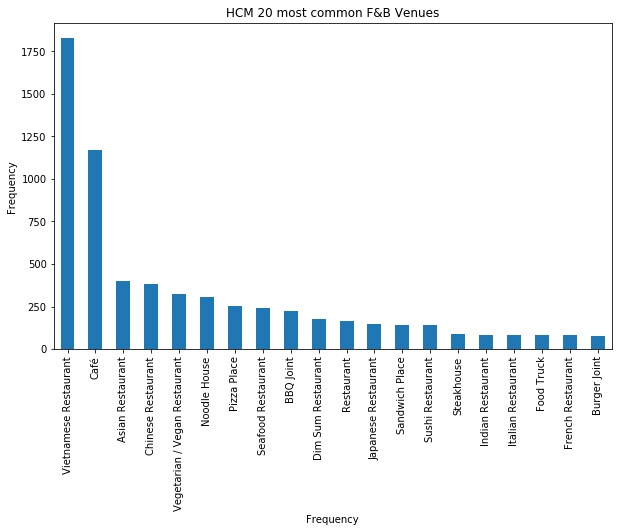

In [276]:
import matplotlib as mpl
import matplotlib.pyplot as plt
a.iloc[:20].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Frequency') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('HCM 20 most common F&B Venues') # add title to the plot

plt.show()

#### Analyzing each neighborhood

In [277]:
# one hot encoding
hcm_onehot = pd.get_dummies(hcm_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hcm_onehot['Neighborhood'] = hcm_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hcm_onehot.columns[-1]] + list(hcm_onehot.columns[:-1])
hcm_onehot = hcm_onehot[fixed_columns]

hcm_onehot.head()

,Neighborhood,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Café,Cantonese Restaurant,Chinese Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Dumpling Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Pizza Place,Ramen Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Phường Tân Định, Quận 1",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Phường Tân Định, Quận 1",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [278]:
hcm_grouped = hcm_onehot.groupby('Neighborhood').mean().reset_index()
hcm_grouped.head()

,Neighborhood,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Café,Cantonese Restaurant,Chinese Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Dumpling Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Pizza Place,Ramen Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,"Phường 01, Quận 10",0.0,0.066667,0.033333,0.0,0.0,0.033333,0.0,0.0,0.033333,0.100000,0.000000,0.000000,0.033333,0.000000,0.0,0.000000,0.0,0.000000,0.033333,0.033333,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.000000,0.1,0.033333,0.0,0.000000,0.0,0.0,0.066667,0.033333,0.0,0.0,0.0,0.033333,0.0,0.233333
1,"Phường 01, Quận 11",0.0,0.033333,0.066667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.133333,0.033333,0.200000,0.000000,0.100000,0.0,0.033333,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.000000,0.0,0.000000,0.0,0.033333,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.033333,0.0,0.233333
2,"Phường 01, Quận 3",0.0,0.033333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.200000,0.000000,0.033333,0.000000,0.000000,0.0,0.000000,0.0,0.033333,0.033333,0.033333,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.033333,0.1,0.033333,0.0,0.000000,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.066667,0.0,0.266667
3,"Phường 01, Quận 4",0.0,0.033333,0.033333,0.0,0.0,0.033333,0.0,0.0,0.033333,0.066667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.033333,0.033333,0.033333,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.033333,0.1,0.033333,0.0,0.000000,0.0,0.0,0.033333,0.033333,0.0,0.0,0.0,0.033333,0.0,0.333333
4,"Phường 01, Quận 5",0.0,0.033333,0.033333,0.0,0.0,0.000000,0.0,0.0,0.033333,0.133333,0.000000,0.000000,0.000000,0.066667,0.0,0.000000,0.0,0.033333,0.033333,0.033333,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.000000,0.1,0.033333,0.0,0.033333,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.033333,0.0,0.266667


In [279]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [280]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hcm_grouped['Neighborhood']

for ind in np.arange(hcm_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hcm_grouped.iloc[ind, :], num_top_venues)

backup1 = neighborhoods_venues_sorted.copy()
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Phường 01, Quận 10",Vietnamese Restaurant,Café,Sandwich Place,Asian Restaurant,Indian Restaurant,Sushi Restaurant,Seafood Restaurant,Food Court,Deli / Bodega,Noodle House
1,"Phường 01, Quận 11",Vietnamese Restaurant,Chinese Restaurant,Café,Dim Sum Restaurant,BBQ Joint,Noodle House,Food Truck,Dumpling Restaurant,Seafood Restaurant,Cantonese Restaurant
2,"Phường 01, Quận 3",Vietnamese Restaurant,Café,Sandwich Place,Vegetarian / Vegan Restaurant,Seafood Restaurant,Food Court,Food,Indian Restaurant,Chinese Restaurant,Noodle House
3,"Phường 01, Quận 4",Vietnamese Restaurant,Sandwich Place,Café,Seafood Restaurant,Food,Indian Restaurant,Noodle House,Pizza Place,Burger Joint,Food Truck
4,"Phường 01, Quận 5",Vietnamese Restaurant,Café,Sandwich Place,Dim Sum Restaurant,Seafood Restaurant,Food Court,Food,Indian Restaurant,Noodle House,Pizza Place


#### Cluster neighborhoods

#### Choosing the best K base on WCSS method

<function matplotlib.pyplot.show(*args, **kw)>

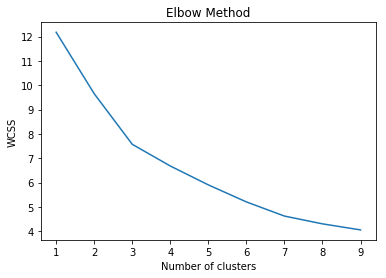

In [281]:
wcss = []
hcm_grouped_clustering = hcm_grouped.drop('Neighborhood', 1)
krange = range(1, 10)
for i in krange:
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hcm_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(krange, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

#### Since the larger the K the better the result, I chose K > 7. Comparing K in plot below I choose K = 8 as the border of each cluster is the most well defined.

In [282]:
# set number of clusters
kclusters = 8
hcm_grouped_clustering = hcm_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hcm_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print("kmeans label",kmeans.labels_[0:10])

# add clustering labels
neighborhoods_venues_sorted=backup1.copy()
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hcm_merged = neighborhoods
hcm_merged = hcm_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
hcm_merged.head()

kmeans label [0 1 0 2 0 1 0 6 6 6]


,District,Ward,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Quận 1,Phường Tân Định,"Phường Tân Định, Quận 1",10.7932,106.69,6,Vietnamese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Café,Pizza Place,Noodle House,Breakfast Spot,Italian Restaurant,Japanese Restaurant,Hotpot Restaurant
1,Quận 1,Phường Đa Kao,"Phường Đa Kao, Quận 1",10.7885,106.698,6,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Pizza Place,Café,Italian Restaurant,Japanese Restaurant,Restaurant,Chinese Restaurant,French Restaurant
2,Quận 1,Phường Bến Nghé,"Phường Bến Nghé, Quận 1",10.7812,106.703,2,Vietnamese Restaurant,Café,Pizza Place,Vegetarian / Vegan Restaurant,Asian Restaurant,French Restaurant,Italian Restaurant,Ramen Restaurant,Restaurant,Breakfast Spot
3,Quận 1,Phường Bến Thành,"Phường Bến Thành, Quận 1",10.7729,106.694,2,Vietnamese Restaurant,Café,Sandwich Place,Vegetarian / Vegan Restaurant,Pizza Place,Indian Restaurant,Italian Restaurant,Burger Joint,Food Truck,Restaurant
4,Quận 1,Phường Nguyễn Thái Bình,"Phường Nguyễn Thái Bình, Quận 1",10.7688,106.699,2,Vietnamese Restaurant,Sandwich Place,Café,Pizza Place,Vegetarian / Vegan Restaurant,BBQ Joint,Restaurant,Food Truck,German Restaurant,Indian Restaurant


In [283]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hcm_merged['Latitude'], hcm_merged['Longitude'], hcm_merged['Neighborhood'], hcm_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' , Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [216]:
#hcm_merged.loc[hcm_merged['Cluster Labels'] == 1, hcm_merged.columns[list(range(2, hcm_merged.shape[1]))]]

In [284]:
b = hcm_merged[['District', 'Ward','Neighborhood','Cluster Labels']].sort_values('Neighborhood')
c = hcm_grouped.sort_values('Neighborhood')
d = b.join(c.set_index('Neighborhood'), on='Neighborhood')
d = d.groupby('Cluster Labels').sum().reset_index()
d

,Cluster Labels,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Café,Cantonese Restaurant,Chinese Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Dumpling Restaurant,Fast Food Restaurant,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Pizza Place,Ramen Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,0,0.000000,1.200000,0.566667,0.000000,0.000000,0.100000,0.000000,0.000000,0.633333,4.200000,0.033333,0.300000,0.100000,0.900000,0.000000,0.000000,0.000000,0.700000,0.933333,0.933333,0.000000,0.000000,0.000000,0.000000,0.066667,0.900000,0.033333,0.066667,0.000000,0.000000,0.000000,0.000000,1.366667,1.033333,0.000000,0.233333,2.566667,0.900000,0.000000,0.400000,0.0,0.033333,1.066667,0.100000,0.000000,0.0,0.000000,1.400000,0.000000,7.233333
1,1,0.000000,2.033333,2.633333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,6.866667,0.566667,9.066667,0.000000,4.400000,0.000000,1.500000,0.300000,0.466667,0.033333,1.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.100000,0.000000,0.233333,0.000000,0.000000,0.000000,0.000000,2.900000,0.066667,0.000000,0.000000,0.033333,2.333333,0.000000,0.133333,0.0,0.000000,0.800000,0.000000,0.000000,0.0,0.000000,1.400000,0.000000,9.033333
2,2,0.066667,0.633333,1.200000,0.000000,0.000000,0.733333,0.700000,0.000000,1.133333,3.533333,0.000000,0.000000,0.200000,0.066667,0.000000,0.000000,0.000000,0.033333,0.700000,0.533333,0.600000,0.033333,0.000000,0.900000,0.700000,1.633333,1.033333,0.200000,0.033333,0.000000,0.000000,0.000000,0.033333,2.500000,0.166667,1.133333,1.300000,0.166667,0.000000,0.000000,0.3,1.100000,0.733333,0.633333,0.866667,0.0,0.000000,1.633333,0.000000,10.766667
3,3,0.000000,4.699885,1.866800,0.000000,0.133333,0.266667,0.071429,0.071429,0.000000,9.270330,0.210632,0.143966,0.133333,0.000000,0.448202,0.000000,0.704762,0.100000,0.000000,0.000000,0.075000,0.266667,0.133333,0.000000,0.000000,0.133333,0.500000,1.123563,1.582934,0.100000,0.000000,0.000000,0.968690,1.454445,0.609683,1.203462,0.000000,2.089135,0.321264,0.000000,0.0,0.819729,0.410632,0.000000,0.433333,0.1,0.066667,0.173730,0.277394,11.036237
4,4,0.000000,1.115669,0.860861,0.193846,0.000000,0.000000,0.040000,0.000000,0.367976,8.773518,0.215747,0.080000,0.000000,0.040000,0.540460,0.040000,1.221538,0.058824,0.257969,0.395385,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.501129,0.055556,0.166667,0.000000,0.000000,0.128889,0.608005,0.210829,1.892965,0.232308,0.435332,0.038462,0.000000,0.0,0.222222,0.000000,0.000000,0.000000,0.0,0.155273,0.040000,0.000000,2.070572
5,5,0.000000,0.433333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.366667,0.766667,1.366667,0.000000,0.533333,0.000000,0.166667,0.200000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.766667,0.000000,0.033333,1.133333,0.533333,0.000000,0.000000,0.033333,2.866667,0.333333,0.000000,0.166667,0.100000,1.966667,0.133333,0.000000,0.0,0.700000,0.933333,0.000000,0.133333,0.0,0.000000,1.400000,0.000000,12.700000
6,6,0.000000,4.276190,0.133333,0.000000,0.033333,0.000000,0.633333,0.000000,0.209524,5.300000,0.800000,1.600000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.566667,0.000000,0.000000,0.133333,0.066667,0.000000,0.566667,1.700000,0.000000,0.000000,0.166667,0.000000,2.409524,2.809524,0.133333,0.376190,0.100000,0.533333,1.033333,0.000000,0.0,0.266667,0.533333,0.000000,0.133333,0.0,0.000000,4.233333,0.000000,10.185714
7,7,0.000000,1.100000,0.933333,0.000000,1.000000,0.000000,0.033333,0.100000,0.5000

In [286]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cluster Labels']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cluster_venues_sorted = pd.DataFrame(columns=columns)
cluster_venues_sorted['Cluster Labels'] = d['Cluster Labels']

for ind in np.arange(d.shape[0]):
    cluster_venues_sorted.iloc[ind, 1:] = return_most_common_venues(d.iloc[ind, :], num_top_venues)

#backup1 = neighborhoods_venues_sorted.copy()
cluster_venues_sorted

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Vietnamese Restaurant,Café,Sandwich Place,Vegetarian / Vegan Restaurant,Noodle House,Asian Restaurant,Sushi Restaurant,Pizza Place,Food Court,Food Truck
1,1,Chinese Restaurant,Vietnamese Restaurant,Café,Dim Sum Restaurant,Noodle House,BBQ Joint,Seafood Restaurant,Asian Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant
2,2,Vietnamese Restaurant,Café,Pizza Place,Vegetarian / Vegan Restaurant,Indian Restaurant,Sandwich Place,BBQ Joint,Burger Joint,Restaurant,Steakhouse
3,3,Vietnamese Restaurant,Café,Asian Restaurant,Seafood Restaurant,BBQ Joint,Korean Restaurant,Pizza Place,Restaurant,Japanese Restaurant,Noodle House
4,4,Café,Vietnamese Restaurant,Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Pizza Place,Diner,Japanese Restaurant,Seafood Restaurant
5,5,Vietnamese Restaurant,Café,Noodle House,Seafood Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Japanese Restaurant,Sushi Restaurant,Cantonese Restaurant,Hotpot Restaurant
6,6,Vietnamese Restaurant,Café,Asian Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Noodle House,Japanese Restaurant,Chinese Restaurant,Snack Place,Cantonese Restaurant
7,7,Café,Restaurant,French Restaurant,Asian Restaurant,Vietnamese Restaurant,Bakery,BBQ Joint,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant
